### CURRENCY EXCHANGE MODULAR PLOTTER

A script that charts multiple versions of a currency's rate against a flexible number of other currencies, and displays them in a modular grid. 

Each chart is given it's own subplot, and the layout of this grid is optimised through a calculation that:

- produces an x by x grid where the number of currencies to be charted is divisible by x
- produces a slightly wider, though as 'square' as possible, grid where it it not 

The exchange rates are pulled from APIs courtesy of www.frankfurter.app.

A version that randomly selects a base currency and the currencies to compare against is also included. Choose 4-20 currencies, or None and a random number of charts will be created.

In [1]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import requests
import json

import modularPlotter

In [68]:
def exchangeRates(currencyA, currencyB, start_date, end_date, amount):    
    
    url = f'https://api.frankfurter.app/{start_date}..{end_date}?amount={amount}&from={currencyA}&to={currencyB}'

    response = requests.get(url)
    jrates = response.json()['rates'] #['data']

    dates = jrates.keys()
    rates = jrates.values()
    rates = [x[currencyB] for x in rates]


    df = pd.DataFrame()
    df['Date'] = jrates.keys()
    df['Rate'] = rates

    return df

#####################################################################

def currencyName(currency_code):

    url = f'https://api.frankfurter.app/currencies'

    response = requests.get(url)
    currency_name = response.json()[currency_code]

    return currency_name

######################################################################

def exchangeRatesPlotter(base_currency, currencies, start_date, end_date, amount):
    
    ### Plotting   
    # General
    
    cols, rows = modularPlotter.SlightlyWide(len(currencies))

    subplot_titles = [f'<b>{x.strip()}</b>' for x in currencies]    
    fig = make_subplots(rows=rows, cols=cols, subplot_titles=(subplot_titles))
    
    height = 400
    fig.update_layout(height=height, showlegend=False, plot_bgcolor='#ffffff', paper_bgcolor='#ffffff')  #width=970, 

    fig['layout'].update(margin=dict(l=0,r=0,b=0,t=50))
    
    plural = 's' if amount != 1 else ''
    fig.update_layout(title_text=f'<b>{amount}x {currencyName(base_currency)}{plural} will get you...</b>')
    fig.update_layout(font_family="Inter, Arial", font_color="#181818", font_size=12)
    fig.update_annotations(font_size=12, xanchor='left')
    
    fig.update_layout(title={"x": 0, "y" : 0.95, "yanchor" : "bottom"})
    
    # Lines
    
    i = 0 
    for n in range(1,rows+1):
        for x in range(1,cols+1):
            
            if i < len(currencies):
                
                df = exchangeRates(base_currency, currencies[i], start_date, end_date, amount)
                
                fig.add_trace(
                    go.Scatter(x=df['Date'], y=df['Rate'], line=dict(color='#181818', width=2)),
                    row=n, col=x
                )
                                                
                fig.layout.annotations[i].update(x = ((x/(cols * 0.935)) - (1/(cols * 0.935)) - 0.01))
                
                fig.update_xaxes(showline=True, linewidth=1, linecolor='#1D1C1A', tickangle=90, tickfont=dict(family='Consolas', size=8))
                fig.update_yaxes(showline=False, tickfont=dict(family='Consolas', size=8))
                
                fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='#f5f5f5',)
                fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='#f5f5f5',)
                
                i += 1
    
    fig.show()

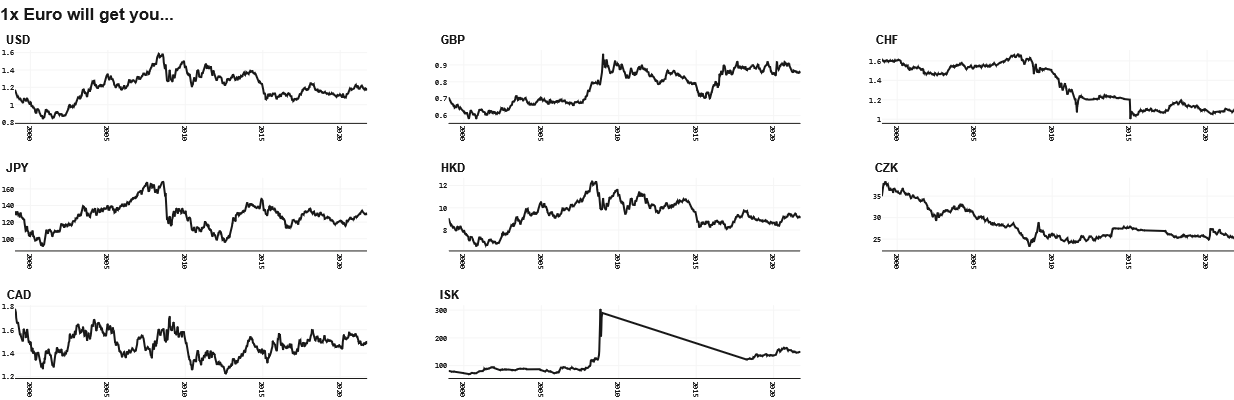

In [124]:
base_currency = 'EUR'

currencies = ['USD', 'GBP', 'CHF', 'JPY', 'HKD', 'CZK', 'CAD', 'ISK']    # 

exchangeRatesPlotter(base_currency, currencies, '1999-01-01', '2021-09-30', 1)

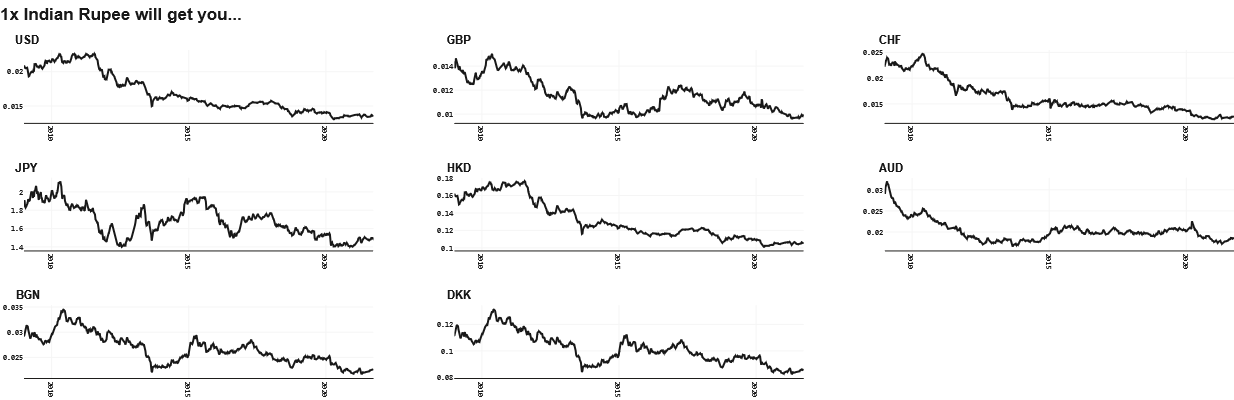

In [70]:
base_currency = 'INR'

currencies = ['USD', 'GBP', 'CHF', 'JPY', 'HKD', 'AUD', 'BGN', 'DKK']    # 

exchangeRatesPlotter(base_currency, currencies, '1999-01-01', '2021-09-30', 1)

In [ ]:
import random 

def randomExchangesPlotter(how_many_currencies):
    
    url = f'https://api.frankfurter.app/currencies'

    response = requests.get(url)
    all_currencies = response.json()   #[currency_code]
    all_currencies_list = list(all_currencies.keys())
        
    if how_many_currencies == None:
        how_many_currencies = random.randrange(3, 18, 1)
            
    x = random.randrange(0, len(all_currencies_list), 1)
    base_currency = all_currencies_list[x]
    
    all_currencies_list.remove(base_currency)
    
    currencies = []
    for i in range(0, how_many_currencies):
        
        x = random.randrange(0, len(all_currencies_list), 2)
        currency = all_currencies_list[x]
        
        currencies.append(currency)
        
        all_currencies_list.remove(currency)
        
    exchangeRatesPlotter(base_currency, currencies, '1999-01-01', '2021-09-30', 1)
    
randomExchangesPlotter(None)